In [2]:
import numpy as np
import pandas as pd
import random
from collections import deque
import time
import warnings
warnings.filterwarnings('ignore')

In [59]:
df = pd.read_csv('EURUSD_M1.csv',sep = '\t',
                   engine = 'python')

In [60]:
df.columns = ['Date', 'TIME', 'Open', 'High', 'Low', 'Close', 'TICKVOL',
       'VOL', 'SPREAD']

In [61]:
df

,Date,TIME,Open,High,Low,Close,TICKVOL,VOL,SPREAD
0,2023.05.12,16:47:00,1.08831,1.08867,1.08828,1.08864,95,0,0
1,2023.05.12,16:48:00,1.08864,1.08869,1.08855,1.08861,95,0,0
2,2023.05.12,16:49:00,1.08861,1.08867,1.08851,1.08864,93,0,0
3,2023.05.12,16:50:00,1.08864,1.08876,1.08854,1.08871,111,0,0
4,2023.05.12,16:51:00,1.08874,1.08886,1.08873,1.08874,101,0,0
...,...,...,...,...,...,...,...,...,...
99995,2023.08.18,10:23:00,1.08737,1.08751,1.08735,1.08749,87,0,0
99996,2023.08.18,10:24:00,1.08749,1.08754,1.08744,1.08748,57,0,0
99997,2023.08.18,10:25:00,1.08748,1.08765,1.08744,1.08765,78,0,0
99998,2023.08.18,10:26:00,1.08765,1.08770,1.08757,1.08760,44,0,0


In [62]:
df=df.iloc[:,1:]

In [6]:
# pd.Timestamp(df['Date'][0])
# df['ut']= pd.to_datetime(df['Date']).map(pd.Timestamp.timestamp)

In [7]:
# df=df.astype({'ut':'int'})
# df['year'] = pd.DatetimeIndex(df['Date']).year
# df['month'] = pd.DatetimeIndex(df['Date']).month
# df['day'] = pd.DatetimeIndex(df['Date']).day
# df['hour'] = pd.DatetimeIndex(df['Date']).hour
# df['minute'] = pd.DatetimeIndex(df['Date']).minute

In [8]:
df

,TIME,Open,High,Low,Close,TICKVOL,VOL,SPREAD
0,16:47:00,1.08831,1.08867,1.08828,1.08864,95,0,0
1,16:48:00,1.08864,1.08869,1.08855,1.08861,95,0,0
2,16:49:00,1.08861,1.08867,1.08851,1.08864,93,0,0
3,16:50:00,1.08864,1.08876,1.08854,1.08871,111,0,0
4,16:51:00,1.08874,1.08886,1.08873,1.08874,101,0,0
...,...,...,...,...,...,...,...,...
99995,10:23:00,1.08737,1.08751,1.08735,1.08749,87,0,0
99996,10:24:00,1.08749,1.08754,1.08744,1.08748,57,0,0
99997,10:25:00,1.08748,1.08765,1.08744,1.08765,78,0,0
99998,10:26:00,1.08765,1.08770,1.08757,1.08760,44,0,0


In [63]:
def bionic_pullback(row):
    '''
    0-5%: excellent strong candle close.
    5-10%: very strong candle close.
    10-20%: strong candle close.
    20-25%: good candle close.
    25-30%: ok candle close.
    30-35%: doubtful candle close.
    35-50% indecisive candle close.
    50-67%: weak candle close.
    67-100% very weak / reversal candle close.
    
    
    for wicks and pullback:-
    The best breakouts have candles which close near the top 20% of the candle size.
    They work ok with wicks between 20 and 30%.
    Risky between 30 and 40%.
    Turn easier into false breaks out above 40%.
    Can lead into reversals more often above 67%.
    '''
    candles_size_ratio=0
    if row.Candles == 1:
        body=(row.High-row.Close)
        pullback=(row.Close-row.Low)
        candles_size_ratio=(row.Close-row.Low)/(row.High-row.Low)
    elif row.Candles == 2:
        body=(row.Close-row.Low)
        pullback=(row.High-row.Close)
        candles_size_ratio=(row.Close-row.Low)/(row.High-row.Low)
    else:
        body=0
        pullback=0
    return (round(body,5)*100000,round(pullback,5)*100000,candles_size_ratio*100)
def finding_candles_patterns(df):
    conditions=[
        df['Close']>df['Open'],
        df['Close']<df['Open'],
        df['Close']==df['Open']
    ]
    values=[2,1,0]#2 for up and 1 for down and 0 for doji pattern
    df['Candles'] = np.select(conditions, values)
    # candles_lst=df['Candles'].values.tolist()
    # result=containsPattern(candles_lst,3)
    # display(df)
    # print(candles_lst)
    return df
df=finding_candles_patterns(df)
df[["Body","Pullback","Candle_Ratio"]] = df.apply(lambda x: bionic_pullback(x), axis=1, result_type="expand")

In [64]:
indexes = df.index

In [65]:
df.columns

Index(['TIME', 'Open', 'High', 'Low', 'Close', 'TICKVOL', 'VOL', 'SPREAD',
       'Candles', 'Body', 'Pullback', 'Candle_Ratio'],
      dtype='object')

In [66]:
df=df[['Open', 'High', 'Low', 'Close','Body', 'Pullback', 'Candle_Ratio']]

# df=df[['Open', 'High', 'Low', 'Close','year',
#        'month', 'day', 'hour', 'minute']]
# df=df[['Open', 'High', 'Low', 'Close']]

In [67]:
df.head(1)

,Open,High,Low,Close,Body,Pullback,Candle_Ratio
0,1.08831,1.08867,1.08828,1.08864,36.0,3.0,92.307692


In [68]:
n = 3
from scipy.signal import argrelextrema
df['min'] = df.iloc[argrelextrema(df.Close.values, np.less_equal,
                    order=n)[0]]['Close']
df['max'] = df.iloc[argrelextrema(df.Close.values, np.greater_equal,
                    order=n)[0]]['Close']

In [69]:
df.head(1)

,Open,High,Low,Close,Body,Pullback,Candle_Ratio,min,max
0,1.08831,1.08867,1.08828,1.08864,36.0,3.0,92.307692,NaN,NaN


In [70]:
df['min'].loc[~df['min'].isnull()] = 1  # not nan
df['min'].loc[df['min'].isnull()] = 0  # nan
df['max'].loc[~df['max'].isnull()] = 1  # not nan
df['max'].loc[df['max'].isnull()] = 0  # nan
df.head(1)

,Open,High,Low,Close,Body,Pullback,Candle_Ratio,min,max
0,1.08831,1.08867,1.08828,1.08864,36.0,3.0,92.307692,0.0,0.0


In [71]:
one_hot_data=np.array(df[['min','max']].values.tolist())
df['label_snr']=np.argmax(one_hot_data, axis=1)

In [11]:
FUTURE_PERIOD_PREDICT = 2
SEQ_LEN = 8

In [73]:
df['future'] = df["Close"].shift(-FUTURE_PERIOD_PREDICT)
# df['fut1'] = df["Close"].shift(3)

In [74]:
# df["imbalance"]=(df["Close"]-df["fut1"])*10000

In [75]:
df.head(1)

,Open,High,Low,Close,Body,Pullback,Candle_Ratio,min,max,label_snr,future
0,1.08831,1.08867,1.08828,1.08864,36.0,3.0,92.307692,0.0,0.0,0,1.08864


In [76]:
# Apply the function
# df = df.fillna(0)

In [77]:
def classify(current,future):
    if float(future) > float(current):
        return 1
    else:
        return 0

In [78]:
def sma(price, period):
    sma = price.rolling(period).mean()
    return sma

def ao(price, period1, period2):
    median = price.rolling(2).median()
    short = sma(median, period1)
    long = sma(median, period2)
    ao = short - long
    ao_df = pd.DataFrame(ao).rename(columns = {'Close':'ao'})
    return ao_df

df['ao'] = ao(df['Close'], 5, 34)

In [79]:
df['MA_20'] = df['Close'].rolling(window = 20).mean() #moving average 20
df['MA_50'] = df['Close'].rolling(window = 50).mean() #moving average 50


df['L14'] = df['Low'].rolling(window=14).min()
df['H14'] = df['High'].rolling(window=14).max()
df['%K'] = 100*((df['Close'] - df['L14']) / (df['H14'] - df['L14']) ) #stochastic oscilator
df['%D'] = df['%K'].rolling(window=3).mean()

df['EMA_20'] = df['Close'].ewm(span = 20, adjust = False).mean() #exponential moving average
df['EMA_50'] = df['Close'].ewm(span = 50, adjust = False).mean()

rsi_period = 14 
chg = df['Close'].diff(1)
gain = chg.mask(chg<0,0)
df['gain'] = gain
loss = chg.mask(chg>0,0)
df['loss'] = loss
avg_gain = gain.ewm(com = rsi_period - 1, min_periods = rsi_period).mean()
avg_loss = loss.ewm(com = rsi_period - 1, min_periods = rsi_period).mean()

df['avg_gain'] = avg_gain
df['avg_loss'] = avg_loss
rs = abs(avg_gain/avg_loss)
df['rsi'] = 100-(100/(1+rs)) #rsi index

df = df.drop(columns = {'Open','Low','High','avg_gain','avg_loss','L14','H14','gain','loss'}) #drop columns that are too correlated or are in somehow inside others

df = df.dropna()
dataset = df.fillna(method="ffill")
dataset = dataset.dropna()

dataset.sort_index(inplace = True)

main_df = dataset

main_df.fillna(method="ffill", inplace=True)  # if there are gaps in data, use previously known values
main_df.dropna(inplace=True)

main_df['target'] = list(map(classify, main_df['Close'], main_df['future']))

main_df.dropna(inplace=True)

main_df['target'].value_counts()

main_df.dropna(inplace=True)

main_df = main_df.astype('float32')

times = sorted(main_df.index.values)
last_5pct = sorted(main_df.index.values)[-int(0.1*len(times))]

validation_main_df = main_df[(main_df.index >= last_5pct)]
main_df = main_df[(main_df.index < last_5pct)]

In [80]:
main_df.head()

,Close,Body,Pullback,Candle_Ratio,min,max,label_snr,future,ao,MA_20,MA_50,%K,%D,EMA_20,EMA_50,rsi,target
49,1.08754,19.0,5.0,20.833334,0.0,0.0,0.0,1.08751,-0.000645,1.087979,1.088506,6.756757,11.323766,1.087984,1.088308,30.361774,0.0
50,1.08772,21.0,3.0,87.500000,0.0,0.0,0.0,1.08757,-0.000621,1.087952,1.088487,33.823528,18.365471,1.087959,1.088285,38.270931,0.0
51,1.08751,21.0,10.0,32.258064,0.0,0.0,0.0,1.08747,-0.000588,1.087914,1.088465,13.157895,17.912727,1.087916,1.088255,33.491768,0.0
52,1.08757,9.0,2.0,81.818184,0.0,0.0,0.0,1.08766,-0.000570,1.087875,1.088444,21.052631,22.678019,1.087883,1.088228,35.952702,1.0
53,1.08747,20.0,1.0,4.761905,1.0,0.0,0.0,1.08748,-0.000560,1.087834,1.088419,7.894737,14.035088,1.087844,1.088198,33.713650,1.0


In [9]:
def preprocess_df(df):
    df = df.drop("future", axis=1) 
    
    from sklearn.preprocessing import MaxAbsScaler
    scaler = MaxAbsScaler()
    # from sklearn.preprocessing import PowerTransformer
    indexes = df.index
    df_scaled = scaler.fit_transform(df)
    
    df = pd.DataFrame(df_scaled,index = indexes)
    
    sequential_data = []  # this is a list that will CONTAIN the sequences
    prev_days = deque(maxlen=SEQ_LEN)  # These will be our actual sequences. They are made with deque, which keeps the maximum length by popping out older values as new ones come in

    for i in df.values:  # iterate over the values
        prev_days.append([n for n in i[:-1]])  # store all but the target
        if len(prev_days) == SEQ_LEN:  # make sure we have 60 sequences
            sequential_data.append([np.array(prev_days), i[-1]]) 

    random.shuffle(sequential_data)  # shuffle for good measure.

    buys = []  # list that will store our buy sequences and targets
    sells = []  # list that will store our sell sequences and targets

    for seq, target in sequential_data:  # iterate over the sequential data
        if target == 0:  # if  put
            sells.append([seq, target])  # append to sells list
        elif target == 1:  # if call
            buys.append([seq, target]) 

    random.shuffle(buys)  
    random.shuffle(sells)  # shuffle 

    
    lower = min(len(buys), len(sells))  

    buys = buys[:lower]  
    sells = sells[:lower]  
    
    
    sequential_data = buys+sells  # add them together
    random.shuffle(sequential_data)  # another shuffle

    X = []
    y = []

    for seq, target in sequential_data:  
        X.append(seq)  # X is the sequences
        y.append(target)  # y is the targets

    return np.array(X), y

In [82]:
train_x, train_y = preprocess_df(main_df)

In [83]:
# train_x[0]

In [84]:
train_x.shape

(86224, 8, 15)

In [85]:
validation_x, validation_y = preprocess_df(validation_main_df)

In [86]:
print(f"train data: {len(train_x)} validation: {len(validation_x)}")
print(f"sells: {train_y.count(0)}, buys: {train_y.count(1)}")
print(f"VALIDATION sells: {validation_y.count(0)}, buys : {validation_y.count(1)}")

train_y = np.asarray(train_y)
validation_y = np.asarray(validation_y)

train data: 86224 validation: 9400
sells: 43112, buys: 43112
VALIDATION sells: 4700, buys : 4700


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
from tensorflow.keras.regularizers import l2
import tensorflow_addons as tfa

In [4]:
 def get_train( train_x, train_y,validation_x, validation_y):
    LEARNING_RATE = 0.001 #isso mesmo
    EPOCHS = 100  # how many passes through our data #20 was good
    BATCH_SIZE = 16  # how many batches? Try smaller batch if you're getting OOM (out of memory) errors.
    NAME = f"{LEARNING_RATE}-{SEQ_LEN}-SEQ-{FUTURE_PERIOD_PREDICT}-{EPOCHS}-{BATCH_SIZE}-PRED-{int(time.time())}"  # a unique name for the model
    print(NAME)
    
    
    try:
      gpus = tf.config.experimental.list_physical_devices('GPU')
      if gpus:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
          tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except Exception as e:
      # Memory growth must be set before GPUs have been initialized
      print(e)
    
    earlyStoppingCallback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
    model = Sequential()
    model.add(LSTM(128, kernel_regularizer=l2(0.01), input_shape=(train_x.shape[1:]), return_sequences=True))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())  #normalizes activation outputs, same reason you want to normalize your input data.16670
    
    model.add(LSTM(128, kernel_regularizer=l2(0.01), activation='tanh', return_sequences=True))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())
    
    model.add(LSTM(128))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))
    
    model.add(Dense(2, activation='softmax'))
    
    
    opt = tf.keras.optimizers.Adam(lr=LEARNING_RATE, decay=5e-5)
    
    # Compile model
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=opt,
        metrics=['accuracy']
    )
    
    tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))
    
    
    checkpoint_filepath = "models/{}.model".format(filepath) # unique file name that will include the epoch and the validation acc for that epoch
    checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max') # saves only the best ones
    
    # Train model
    history = model.fit(
        train_x, train_y,
        batch_size=BATCH_SIZE,
        epochs=EPOCHS,
        validation_data =(validation_x, validation_y),
        callbacks=[tensorboard, checkpoint, earlyStoppingCallback],
    )
    return filepath

In [89]:
get_train( train_x, train_y,validation_x, validation_y)

0.001-8-SEQ-2-100-16-PRED-1692528618
1 Physical GPUs, 1 Logical GPUs
Epoch 1/100
5387/5389 [============================>.] - ETA: 0s - loss: 0.6722 - accuracy: 0.7440
Epoch 1: val_accuracy improved from -inf to 0.74894, saving model to models\LSTM-best.model


INFO:tensorflow:Assets written to: models\LSTM-best.model\assets


INFO:tensorflow:Assets written to: models\LSTM-best.model\assets


5389/5389 [==============================] - 77s 14ms/step - loss: 0.6722 - accuracy: 0.7441 - val_loss: 0.5224 - val_accuracy: 0.7489
Epoch 2/100
5386/5389 [============================>.] - ETA: 0s - loss: 0.5074 - accuracy: 0.7760
Epoch 2: val_accuracy improved from 0.74894 to 0.78489, saving model to models\LSTM-best.model


INFO:tensorflow:Assets written to: models\LSTM-best.model\assets


INFO:tensorflow:Assets written to: models\LSTM-best.model\assets


5389/5389 [==============================] - 72s 13ms/step - loss: 0.5074 - accuracy: 0.7760 - val_loss: 0.4845 - val_accuracy: 0.7849
Epoch 3/100
5388/5389 [============================>.] - ETA: 0s - loss: 0.4970 - accuracy: 0.7798
Epoch 3: val_accuracy improved from 0.78489 to 0.78798, saving model to models\LSTM-best.model


INFO:tensorflow:Assets written to: models\LSTM-best.model\assets


INFO:tensorflow:Assets written to: models\LSTM-best.model\assets


5389/5389 [==============================] - 73s 13ms/step - loss: 0.4970 - accuracy: 0.7798 - val_loss: 0.4769 - val_accuracy: 0.7880
Epoch 4/100
5386/5389 [============================>.] - ETA: 0s - loss: 0.4900 - accuracy: 0.7831
Epoch 4: val_accuracy did not improve from 0.78798
5389/5389 [==============================] - 62s 12ms/step - loss: 0.4900 - accuracy: 0.7831 - val_loss: 0.4791 - val_accuracy: 0.7806
Epoch 5/100
5385/5389 [============================>.] - ETA: 0s - loss: 0.4831 - accuracy: 0.7838
Epoch 5: val_accuracy improved from 0.78798 to 0.79043, saving model to models\LSTM-best.model


INFO:tensorflow:Assets written to: models\LSTM-best.model\assets


INFO:tensorflow:Assets written to: models\LSTM-best.model\assets


5389/5389 [==============================] - 72s 13ms/step - loss: 0.4831 - accuracy: 0.7838 - val_loss: 0.4694 - val_accuracy: 0.7904
Epoch 6/100
5388/5389 [============================>.] - ETA: 0s - loss: 0.4831 - accuracy: 0.7853
Epoch 6: val_accuracy did not improve from 0.79043
5389/5389 [==============================] - 58s 11ms/step - loss: 0.4831 - accuracy: 0.7853 - val_loss: 0.4678 - val_accuracy: 0.7890
Epoch 7/100
5387/5389 [============================>.] - ETA: 0s - loss: 0.4804 - accuracy: 0.7860
Epoch 7: val_accuracy did not improve from 0.79043
5389/5389 [==============================] - 57s 11ms/step - loss: 0.4804 - accuracy: 0.7860 - val_loss: 0.4700 - val_accuracy: 0.7887
Epoch 8/100
5388/5389 [============================>.] - ETA: 0s - loss: 0.4765 - accuracy: 0.7869
Epoch 8: val_accuracy did not improve from 0.79043
5389/5389 [==============================] - 57s 11ms/step - loss: 0.4765 - accuracy: 0.7869 - val_loss: 0.4746 - val_accuracy: 0.7876
Epoch 9/10

INFO:tensorflow:Assets written to: models\LSTM-best.model\assets


INFO:tensorflow:Assets written to: models\LSTM-best.model\assets


5389/5389 [==============================] - 73s 14ms/step - loss: 0.4728 - accuracy: 0.7886 - val_loss: 0.4624 - val_accuracy: 0.7911
Epoch 12/100
5389/5389 [==============================] - ETA: 0s - loss: 0.4723 - accuracy: 0.7884
Epoch 12: val_accuracy did not improve from 0.79106
5389/5389 [==============================] - 60s 11ms/step - loss: 0.4723 - accuracy: 0.7884 - val_loss: 0.4613 - val_accuracy: 0.7905
Epoch 13/100
5387/5389 [============================>.] - ETA: 0s - loss: 0.4701 - accuracy: 0.7893
Epoch 13: val_accuracy did not improve from 0.79106
5389/5389 [==============================] - 59s 11ms/step - loss: 0.4701 - accuracy: 0.7892 - val_loss: 0.4611 - val_accuracy: 0.7894
Epoch 14/100
5385/5389 [============================>.] - ETA: 0s - loss: 0.4700 - accuracy: 0.7885
Epoch 14: val_accuracy did not improve from 0.79106
5389/5389 [==============================] - 64s 12ms/step - loss: 0.4699 - accuracy: 0.7886 - val_loss: 0.4593 - val_accuracy: 0.7907
Epoc

INFO:tensorflow:Assets written to: models\LSTM-best.model\assets


INFO:tensorflow:Assets written to: models\LSTM-best.model\assets


5389/5389 [==============================] - 73s 14ms/step - loss: 0.4667 - accuracy: 0.7899 - val_loss: 0.4572 - val_accuracy: 0.7916
Epoch 18/100
5387/5389 [============================>.] - ETA: 0s - loss: 0.4662 - accuracy: 0.7904
Epoch 18: val_accuracy improved from 0.79160 to 0.79245, saving model to models\LSTM-best.model


INFO:tensorflow:Assets written to: models\LSTM-best.model\assets


INFO:tensorflow:Assets written to: models\LSTM-best.model\assets


5389/5389 [==============================] - 72s 13ms/step - loss: 0.4662 - accuracy: 0.7904 - val_loss: 0.4568 - val_accuracy: 0.7924
Epoch 19/100
5387/5389 [============================>.] - ETA: 0s - loss: 0.4658 - accuracy: 0.7904
Epoch 19: val_accuracy did not improve from 0.79245
5389/5389 [==============================] - 61s 11ms/step - loss: 0.4657 - accuracy: 0.7905 - val_loss: 0.4567 - val_accuracy: 0.7922
Epoch 20/100
5388/5389 [============================>.] - ETA: 0s - loss: 0.4669 - accuracy: 0.7901
Epoch 20: val_accuracy did not improve from 0.79245
5389/5389 [==============================] - 63s 12ms/step - loss: 0.4669 - accuracy: 0.7900 - val_loss: 0.4564 - val_accuracy: 0.7911
Epoch 21/100
5386/5389 [============================>.] - ETA: 0s - loss: 0.4641 - accuracy: 0.7904
Epoch 21: val_accuracy did not improve from 0.79245
5389/5389 [==============================] - 63s 12ms/step - loss: 0.4641 - accuracy: 0.7904 - val_loss: 0.4563 - val_accuracy: 0.7906
Epoc

INFO:tensorflow:Assets written to: models\LSTM-best.model\assets


INFO:tensorflow:Assets written to: models\LSTM-best.model\assets


5389/5389 [==============================] - 73s 13ms/step - loss: 0.4620 - accuracy: 0.7912 - val_loss: 0.4542 - val_accuracy: 0.7926
Epoch 27/100
5388/5389 [============================>.] - ETA: 0s - loss: 0.4632 - accuracy: 0.7912
Epoch 27: val_accuracy did not improve from 0.79255
5389/5389 [==============================] - 58s 11ms/step - loss: 0.4631 - accuracy: 0.7912 - val_loss: 0.4557 - val_accuracy: 0.7920
Epoch 28/100
5385/5389 [============================>.] - ETA: 0s - loss: 0.4632 - accuracy: 0.7906
Epoch 28: val_accuracy did not improve from 0.79255
5389/5389 [==============================] - 59s 11ms/step - loss: 0.4632 - accuracy: 0.7906 - val_loss: 0.4550 - val_accuracy: 0.7920
Epoch 29/100
5388/5389 [============================>.] - ETA: 0s - loss: 0.4625 - accuracy: 0.7907
Epoch 29: val_accuracy did not improve from 0.79255
5389/5389 [==============================] - 59s 11ms/step - loss: 0.4625 - accuracy: 0.7907 - val_loss: 0.4546 - val_accuracy: 0.7921


'LSTM-best'

In [4]:
model = tf.keras.models.load_model('models/LSTM-best.model')

In [115]:
from sklearn.metrics import accuracy_score
prediction = pd.DataFrame(model.predict(validation_x))

294/294 [==============================] - 1s 5ms/step


In [116]:
prediction

,0,1
0,0.236793,0.763207
1,0.490024,0.509976
2,0.023323,0.976678
3,0.044244,0.955756
4,0.758350,0.241650
...,...,...
9395,0.302875,0.697125
9396,0.261784,0.738216
9397,0.837968,0.162032
9398,0.782469,0.217531


In [117]:
m = np.zeros_like(prediction.values)
m[np.arange(len(prediction)), prediction.values.argmax(1)] = 1

prediction = pd.DataFrame(m, columns = prediction.columns).astype(int)
prediction = prediction.drop(columns = {0})

In [118]:
high_acurate = prediction.loc[prediction[1] > 0.55]

In [119]:
high_index = high_acurate.index
validation_y_used = pd.DataFrame(validation_y) # TRANSFORM NUMPY TO DATAFRAM
prediction_compare  = validation_y_used.loc[high_index] #LOCATES THE INDEX THAT HAVE BEEN SEPARATED
prediction_compare[0].value_counts() # SHOW THE VALUES. AS WE CHOOSE 0 IN THE OTHER THE 0 MUST HAVE A BIGGER PROB
len(prediction)

acc = accuracy_score(validation_y,prediction)

In [120]:
acc

0.7925531914893617

In [139]:
from sklearn.metrics import accuracy_score
prediction = pd.DataFrame(model.predict(validation_x))

m = np.zeros_like(prediction.values)
m[np.arange(len(prediction)), prediction.values.argmax(1)] = 1

prediction = pd.DataFrame(m, columns = prediction.columns).astype(int)
prediction = prediction.drop(columns = {0})
validation_y = pd.DataFrame(validation_y)
print(len(validation_y))
high_acurate = prediction.loc[prediction[1] > 0.55] #VALUES THAT HE PRESENTED OR PROBABLY GREATER THAN 0.55

high_index = high_acurate.index     # GET THE INDEX OF THOSE WHO HAD PROB ABOVE THE SPECIFIED

validation_y_used = pd.DataFrame(validation_y) # TRANSFORM NUMPY TO DATAFRAM
prediction_compare  = validation_y_used.loc[high_index] #LOCATES THE INDEX THAT HAVE BEEN SEPARATED
prediction_compare[0].value_counts() # SHOW THE VALUES. AS WE CHOOSE 0 IN THE OTHER THE 0 MUST HAVE A BIGGER PROB
len(prediction)

acc = accuracy_score(validation_y,prediction)

294/294 [==============================] - 1s 5ms/step
9400


In [140]:
acc

0.7925531914893617

In [94]:
p = pd.DataFrame(model.predict(validation_x))
m = np.zeros_like(p.values)
m[np.arange(len(p)), p.values.argmax(1)]=1
p= pd.DataFrame(m, columns = p.columns).astype(int)
pp = p.drop(columns = {0})
ccc = p.drop(columns = {1})
h = pp.loc[pp[1] > 0.75]
c = ccc.loc[ccc[0] > 0.75]
v = validation_y_used.loc[h.index]
cc = validation_y_used.loc[c.index]
accuracy_score(v,pp.loc[h.index])#,accuracy_score(cc,p.loc[c.index])
# p.head()

294/294 [==============================] - 2s 5ms/step


0.7883808724832215

In [5]:
head = ['HK Time', 'Open', 'High', 'Low', 'Close', 'Volume']
data_2017 = pd.read_csv("OUT_DAT_ASCII_AUDJPY_M1_2017.csv", delimiter=";", 
                        names=head)
data_2018 = pd.read_csv("OUT_DAT_ASCII_AUDJPY_M1_2018.csv", delimiter=";",
                        names=head)
data_2019 = pd.read_csv("OUT_DAT_ASCII_AUDJPY_M1_201901.csv", delimiter=";",
                        names=head)

In [6]:
def data_preprcessing(df):
    def bionic_pullback(row):
        '''
        0-5%: excellent strong candle close.
        5-10%: very strong candle close.
        10-20%: strong candle close.
        20-25%: good candle close.
        25-30%: ok candle close.
        30-35%: doubtful candle close.
        35-50% indecisive candle close.
        50-67%: weak candle close.
        67-100% very weak / reversal candle close.


        for wicks and pullback:-
        The best breakouts have candles which close near the top 20% of the candle size.
        They work ok with wicks between 20 and 30%.
        Risky between 30 and 40%.
        Turn easier into false breaks out above 40%.
        Can lead into reversals more often above 67%.
        '''
        candles_size_ratio=0
        if row.Candles == 1:
            body=(row.High-row.Close)
            pullback=(row.Close-row.Low)
            candles_size_ratio=(row.Close-row.Low)/(row.High-row.Low)
        elif row.Candles == 2:
            body=(row.Close-row.Low)
            pullback=(row.High-row.Close)
            candles_size_ratio=(row.Close-row.Low)/(row.High-row.Low)
        else:
            body=0
            pullback=0
        return (round(body,5)*100000,round(pullback,5)*100000,candles_size_ratio*100)
    def finding_candles_patterns(df):
        conditions=[
            df['Close']>df['Open'],
            df['Close']<df['Open'],
            df['Close']==df['Open']
        ]
        values=[2,1,0]#2 for up and 1 for down and 0 for doji pattern
        df['Candles'] = np.select(conditions, values)
        # candles_lst=df['Candles'].values.tolist()
        # result=containsPattern(candles_lst,3)
        # display(df)
        # print(candles_lst)
        return df
    df=finding_candles_patterns(df)
    df[["Body","Pullback","Candle_Ratio"]] = df.apply(lambda x: bionic_pullback(x), axis=1, result_type="expand")
    indexes = df.index
    df=df[['Open', 'High', 'Low', 'Close','Body', 'Pullback', 'Candle_Ratio']]
    FUTURE_PERIOD_PREDICT = 2
    SEQ_LEN = 8
    n = 3
    from scipy.signal import argrelextrema
    df['min'] = df.iloc[argrelextrema(df.Close.values, np.less_equal,
                        order=n)[0]]['Close']
    df['max'] = df.iloc[argrelextrema(df.Close.values, np.greater_equal,
                        order=n)[0]]['Close']
    
    df['min'].loc[~df['min'].isnull()] = 1  # not nan
    df['min'].loc[df['min'].isnull()] = 0  # nan
    df['max'].loc[~df['max'].isnull()] = 1  # not nan
    df['max'].loc[df['max'].isnull()] = 0  # nan
    
    one_hot_data=np.array(df[['min','max']].values.tolist())
    df['label_snr']=np.argmax(one_hot_data, axis=1)
    
    FUTURE_PERIOD_PREDICT = 2
    SEQ_LEN = 8
    
    df['future'] = df["Close"].shift(-FUTURE_PERIOD_PREDICT)
    
    def classify(current,future):
        if float(future) > float(current):
            return 1
        else:
            return 0
    def sma(price, period):
        sma = price.rolling(period).mean()
        return sma

    def ao(price, period1, period2):
        median = price.rolling(2).median()
        short = sma(median, period1)
        long = sma(median, period2)
        ao = short - long
        ao_df = pd.DataFrame(ao).rename(columns = {'Close':'ao'})
        return ao_df

    df['ao'] = ao(df['Close'], 5, 34)
    
    df['MA_20'] = df['Close'].rolling(window = 20).mean() #moving average 20
    df['MA_50'] = df['Close'].rolling(window = 50).mean() #moving average 50


    df['L14'] = df['Low'].rolling(window=14).min()
    df['H14'] = df['High'].rolling(window=14).max()
    df['%K'] = 100*((df['Close'] - df['L14']) / (df['H14'] - df['L14']) ) #stochastic oscilator
    df['%D'] = df['%K'].rolling(window=3).mean()

    df['EMA_20'] = df['Close'].ewm(span = 20, adjust = False).mean() #exponential moving average
    df['EMA_50'] = df['Close'].ewm(span = 50, adjust = False).mean()

    rsi_period = 14 
    chg = df['Close'].diff(1)
    gain = chg.mask(chg<0,0)
    df['gain'] = gain
    loss = chg.mask(chg>0,0)
    df['loss'] = loss
    avg_gain = gain.ewm(com = rsi_period - 1, min_periods = rsi_period).mean()
    avg_loss = loss.ewm(com = rsi_period - 1, min_periods = rsi_period).mean()

    df['avg_gain'] = avg_gain
    df['avg_loss'] = avg_loss
    rs = abs(avg_gain/avg_loss)
    df['rsi'] = 100-(100/(1+rs)) #rsi index

    df = df.drop(columns = {'Open','Low','High','avg_gain','avg_loss','L14','H14','gain','loss'}) #drop columns that are too correlated or are in somehow inside others

    df = df.dropna()
    dataset = df.fillna(method="ffill")
    dataset = dataset.dropna()

    dataset.sort_index(inplace = True)

    main_df = dataset

    main_df.fillna(method="ffill", inplace=True)  # if there are gaps in data, use previously known values
    main_df.dropna(inplace=True)

    main_df['target'] = list(map(classify, main_df['Close'], main_df['future']))

    main_df.dropna(inplace=True)

    main_df['target'].value_counts()

    main_df.dropna(inplace=True)

    main_df = main_df.astype('float32')

    times = sorted(main_df.index.values)
    last_5pct = sorted(main_df.index.values)[-int(0.1*len(times))]

    validation_main_df = main_df[(main_df.index >= last_5pct)]
    main_df = main_df[(main_df.index < last_5pct)]
    return validation_main_df,main_df

In [12]:
validation_main_df1,main_df1 = data_preprcessing(data_2017)
train_x1, train_y1 = preprocess_df(main_df1)
validation_x1, validation_y1 = preprocess_df(validation_main_df1)

In [13]:
print(f"train data: {len(train_x1)} validation: {len(validation_x1)}")
print(f"sells: {train_y1.count(0)}, buys: {train_y1.count(1)}")
print(f"VALIDATION sells: {validation_y1.count(0)}, buys : {validation_y1.count(1)}")

train_y1 = np.asarray(train_y1)
validation_y1 = np.asarray(validation_y1)

train data: 325830 validation: 35872
sells: 162915, buys: 162915
VALIDATION sells: 17936, buys : 17936


In [14]:
from sklearn.metrics import accuracy_score
prediction = pd.DataFrame(model.predict(train_x1))

m = np.zeros_like(prediction.values)
m[np.arange(len(prediction)), prediction.values.argmax(1)] = 1

prediction = pd.DataFrame(m, columns = prediction.columns).astype(int)
prediction = prediction.drop(columns = {0})
validation_y1 = pd.DataFrame(train_y1)
print(len(train_y1))
high_acurate = prediction.loc[prediction[1] > 0.55] #VALUES THAT HE PRESENTED OR PROBABLY GREATER THAN 0.55

high_index = high_acurate.index     # GET THE INDEX OF THOSE WHO HAD PROB ABOVE THE SPECIFIED

validation_y_used = pd.DataFrame(train_y1) # TRANSFORM NUMPY TO DATAFRAM
prediction_compare  = validation_y_used.loc[high_index] #LOCATES THE INDEX THAT HAVE BEEN SEPARATED
prediction_compare[0].value_counts() # SHOW THE VALUES. AS WE CHOOSE 0 IN THE OTHER THE 0 MUST HAVE A BIGGER PROB
len(prediction)

acc = accuracy_score(train_y1,prediction)

10183/10183 [==============================] - 49s 4ms/step
325830


In [15]:
acc

0.7818095325783384

In [16]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_27 (LSTM)              (None, 8, 128)            73728     
                                                                 
 dropout_36 (Dropout)        (None, 8, 128)            0         
                                                                 
 batch_normalization_27 (Bat  (None, 8, 128)           512       
 chNormalization)                                                
                                                                 
 lstm_28 (LSTM)              (None, 8, 128)            131584    
                                                                 
 dropout_37 (Dropout)        (None, 8, 128)            0         
                                                                 
 batch_normalization_28 (Bat  (None, 8, 128)           512       
 chNormalization)                                     

In [17]:
prediction['actual_value']=validation_y_used[0]

In [18]:
prediction.columns=['perdicted', 'actual_value']

In [19]:
prediction.loc[(prediction['perdicted']==prediction['actual_value'])&(prediction['perdicted']==1)].count()

perdicted       128384
actual_value    128384
dtype: int64

In [20]:
prediction.loc[(prediction['perdicted']!=prediction['actual_value'])&(prediction['perdicted']==1)].count()

perdicted       36562
actual_value    36562
dtype: int64

In [21]:
prediction['balance']=0

In [22]:
price=10
for i in range(len(prediction)):
    if (prediction['perdicted'][i] == prediction['actual_value'][i]) & (prediction['perdicted'][i] == 1):
        price = price+1
    elif (prediction['perdicted'][i] != prediction['actual_value'][i]) & (prediction['perdicted'][i] == 1):
        price = price-1
    prediction['balance'][i] = price

<Axes: >

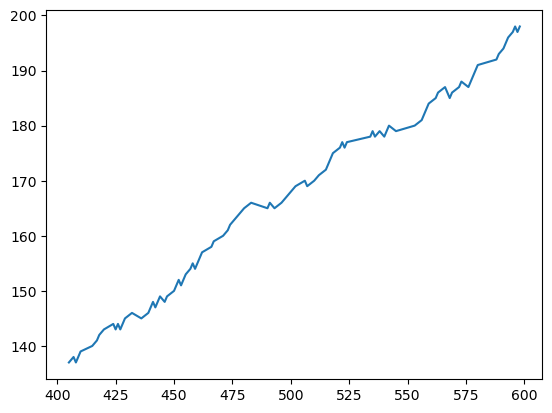

In [23]:
prediction['balance'].loc[prediction['perdicted'] == 1][200:300].plot()